In [14]:
import numpy as np
X = np.load('data/hand_waving.npy')
Y = np.load('data/not_hand_waving.npy')

In [15]:
len(X)

648

In [16]:
X.shape

(648, 3, 300, 25, 1)

In [17]:
X = np.swapaxes(X,1,4)

Y = np.swapaxes(Y,1,4)

In [18]:
X = np.swapaxes(X,1,0)[0]
Y = np.swapaxes(Y,1,0)[0]
X.shape

(648, 300, 25, 3)

In [19]:
def onlyArm(arr):
    return np.array([arr[8],arr[9], arr[10] , arr[4],arr[5],arr[6] ]).swapaxes(1,0)[[0,2]].swapaxes(1,0)

In [22]:
new_X = []
for sample in X:
    new_sample = []
    for frame in sample:
        new_sample.append ( (onlyArm(frame) ) ) 
    new_X.append(np.array(new_sample))
#new_X = []
# for sample in X:
#     new_sample = []
#     for frame in sample:
#         new_sample.append ( (norm(onlyArm(frame)) ) )
#     new_X.append(np.array(new_sample))

In [23]:
new_Y = []
for sample in Y:
    new_sample = []
    for frame in sample:
        new_sample.append ( (onlyArm(frame) ) ) 
    new_Y.append(np.array(new_sample))
#new_X = []
# for sample in X:
#     new_sample = []
#     for frame in sample:
#         new_sample.append ( (norm(onlyArm(frame)) ) )
#     new_X.append(np.array(new_sample))

In [24]:
np.array(new_X).shape

(648, 300, 6, 2)

In [25]:
np.array(new_Y).shape

(650, 300, 6, 2)

In [26]:
import numpy as np
import pylab as plt

def new_plot(arr):




    
    r_arm =np.swapaxes( np.array([arr[0],arr[1],arr[2] ] )   ,0,1)
    l_arm = np.swapaxes( np.array([arr[3],arr[4],arr[5]])    ,0,1)
    link = np.swapaxes( np.array([arr[0],arr[3]])    ,0,1)
#     head = np.swapaxes(np.array([arr[3]]),0,1) 

    fig, ax = plt.subplots()
    ax.axis([-1, 1, -1, 1])
#     ax.plot(body[0],body[2],'.-')
#     ax.plot(l_leg[0],l_leg[2],'.-')
#     ax.plot(r_leg[0],r_leg[2],'.-')
    ax.plot(l_arm[0],l_arm[1],'.-')
    ax.plot(r_arm[0],r_arm[1],'.-')
    ax.plot(link[0],link[1],'.-')
#     ax.plot(l_hand[0],l_hand[2],'.')
#     ax.plot(r_hand[0],r_hand[2],'.')
#     ax.plot(head[0],head[2],'ro',markersize=15)
    plt.show()
    
    
    

In [27]:
new_X = np.array(new_X)
new_Y = np.array(new_Y)

In [28]:
new_X

array([[[[ 1.28880024e-01,  1.37259066e-01],
         [ 1.43418297e-01, -6.04381412e-02],
         [ 2.68182218e-01, -1.89494759e-01],
         [-1.14795290e-01,  1.37259066e-01],
         [-1.73345819e-01, -7.70787299e-02],
         [-9.35745016e-02, -1.59753636e-01]],

        [[ 1.28094003e-01,  1.37015745e-01],
         [ 1.43927112e-01, -6.04907349e-02],
         [ 2.69413173e-01, -1.88614473e-01],
         [-1.15659542e-01,  1.36741772e-01],
         [-1.72848508e-01, -7.50714764e-02],
         [-9.52445045e-02, -1.58802375e-01]],

        [[ 1.28298834e-01,  1.36334166e-01],
         [ 1.51063979e-01, -4.22151387e-02],
         [ 2.63331503e-01, -1.78134903e-01],
         [-1.16204336e-01,  1.36958182e-01],
         [-1.70151025e-01, -7.34208003e-02],
         [-9.33192819e-02, -1.63374200e-01]],

        ...,

        [[ 1.06948726e-01,  1.82970196e-01],
         [ 2.14096904e-01,  2.31129050e-01],
         [ 3.21459472e-01,  3.92046750e-01],
         [-1.01023085e-01,  1.44175

[ 91.11346   88.54461  359.9026    76.899704  89.923515]


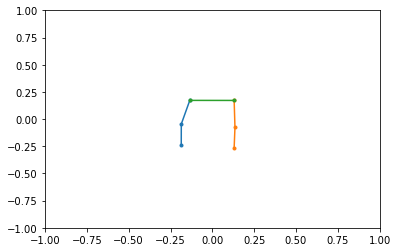

In [29]:
A = new_X[1][1]
import numpy as np

v = [
    (A[0]-A[1]), (A[1]-A[2]) , (A[0]-A[3]), (A[3]-A[4]),(A[4]-A[5])
]
v = np.array(v)
inv = np.degrees(np.arctan2(*v.T[::-1])) % 360.0
print(inv)
new_plot(A)

In [30]:
def findAngleR(p0,p1,p2):
    v0 = np.array(p0) - np.array(p1)
    v1 = np.array(p2) - np.array(p1)
    angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1)) 
    return np.degrees(angle)%360

In [31]:
def findAngleL(p0,p1,p2):
    v0 = np.array(p0) - np.array(p1)
    v1 = np.array(p2) - np.array(p1)
    angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1)) 
    return 360-np.degrees(angle)%360

In [40]:
X_angle = []
Y_angle = []
for A in new_X:


    AngleA = np.zeros((4,300))
    for i in range(len(A)):
        c = A[i]
        AngleA[0][i] = (findAngleR(c[3],c[4],c[5]))
        AngleA[1][i] = (findAngleR(c[4],c[3],c[0]))
        AngleA[2][i] = (findAngleL(c[1],c[0],c[3]))
        AngleA[3][i] = (findAngleL(c[0],c[1],c[2]))
    X_angle.append(AngleA)
X_angle = np.array(X_angle)
print(X_angle.shape)


for B in new_Y:


    AngleB = np.zeros((4,300))
    for i in range(len(B)):
        c = B[i]
        AngleB[0][i] = (findAngleR(c[3],c[4],c[5]))
        AngleB[1][i] = (findAngleR(c[4],c[3],c[0]))
        AngleB[2][i] = (findAngleL(c[1],c[0],c[3]))
        AngleB[3][i] = (findAngleL(c[0],c[1],c[2]))
    Y_angle.append(AngleB)
Y_angle = np.array(Y_angle)
print(Y_angle.shape)
# B = new_Y[2]
# AngleB = [ [] for i in range(4)]
# for c in B:
#     AngleB[0].append(findAngleR(c[3],c[4],c[5]))
#     AngleB[1].append(findAngleR(c[4],c[3],c[0]))
#     AngleB[2].append(findAngleR(c[1],c[0],c[3]))
#     AngleB[3].append(findAngleR(c[0],c[1],c[2]))


# name = ['left elbow','left shoulder','right shoulder','right elbow']


# for i in range(len(AngleA)):
#     axes[i][0].title.set_text(name[i])
#     axes[i][0].plot(AngleA[i])
#     axes[i][0].set_ylim(0, 360)

# for i in range(len(AngleB)):
#     axes[i][1].title.set_text(name[i])
#     axes[i][1].plot(AngleB[i])
#     axes[i][1].set_ylim(0, 360)
# f.savefig("somefile.png")








# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np

# fig = plt.figure()
# # plt.subplots_adjust(top = 3,bottom=1,hspace=1)
# ax0 = plt.subplot(411)
# ax1 = plt.subplot(412)
# ax2 = plt.subplot(413)
# ax3 = plt.subplot(414)
# ax0.plot(AngleA[0], label='$y = numbers')
# ax1.plot(AngleA[1], label='$y = numbers')
# ax2.plot(AngleA[2],  label='$y = numbers')
# ax3.plot(AngleA[3],  label='$y = numbers')
# # plt.title('Legend inside')

# plt.show()

# fig.savefig('plot.png')

(648, 4, 300)
(650, 4, 300)


In [ ]:
np.save('X_angle.npy',X_angle)
np.save('X_angle.npy',X_angle)

In [ ]:
for i in range

In [148]:
# for k in new_X:
#     for c in k:
#         new_plot(c)